<font size="+4" color="#00FF00"><h1>Capstone Project</h1></font>


<font size="+4" color="#000000"><h1>___________________________________</h1></font>

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/c/ca/Walmart_logo.svg" alt="Walmart Logo" width="450px" />
    <font size="+3" color="#FFA500"><b>Sales Forecasting</b></font>
</div>


<font size="+4" color="#000000"><h1>___________________________________</h1></font>

<font color="#FF8C00"><h2>Problem Statement:</h2></font>

A **<font color="#004080">Retail</font> <font color="#D4A669">Store</font>** that has multiple outlets across the country.

They are facing issues in managing the inventory - to match the demand with respect to supply.


<font color="#A04F0E"><h2>Dataset Information:</h2></font>

You are provided with the <font color="#8C593A">Weekly_Sales</font> data for their various outlets.

The **<font color="#004080">Walmart</font><font color="#FF8C00">.csv</font>** contains <font color="#264C4D">6435 rows</font> and <font color="#264C4D">8 columns.</font>

| Feature Name   | Description                                      |
|----------------|--------------------------------------------------|
| <font color="#264C4D">Stores</font>          | Store number                                     |
| <font color="#1B4E75">Date</font>           | Week of Sales                                    |
| <font color="#8C593A">Weekly_Sales</font>   | Sales for the given store in that week            |
| <font color="#992600">Holiday_Flag</font>   | Indicates if it is a holiday week                 |
| <font color="#D4A669">Temperature</font>    | Temperature on the day of the sale                |
| <font color="#004080">Fuel_Price</font>     | Cost of fuel in the region                        |
| <font color="#6A287E">CPI</font>           | Consumer Price Index                              |
| <font color="#FF5733">Unemployment</font>   | Unemployment Rate                                 |

<font color="#FF8C00"><h2>Objectives:</h2></font>

1. Use
  > * Handle the <font color="#FF4500">missing values</font>
  > * <font color="#D4A669">Exploratory Data Analysis (EDA)</font>
  > * <font color="#D4A669">Outlier Analysis</font>
  > * <font color="#D4A669">Statistical Analysis</font>

  To come up with <font color="#FF4500">various INSIGHTS</font> that can give them a <font color="#FF8C00">clear perspective</font> on the following:

   > * a. If the <font color="#8C593A">Weekly_Sales</font> are affected by the <font color="#FF5733">Unemployment</font> Rate,
    * If YES - which <font color="#264C4D">Stores</font> are <font color="#FF8C00">suffering the most</font>?
   >
   > * b. If the <font color="#8C593A">Weekly_Sales</font> show a <font color="#D4A669">seasonal trend</font>,
    * When and what could be the <font color="#FF8C00">reason</font>?
   >
   > * c. Does <font color="#D4A669">temperature</font> affect the <font color="#8C593A">Weekly_Sales</font> in any manner?
   >
   >* d. How is the <font color="#6A287E">Consumer Price index (CPI)</font> affecting the <font color="#8C593A">Weekly_Sales</font> of various <font color="#264C4D">Stores</font>?
   >
   > * e. <font color="#FF8C00">TOP Performing</font> <font color="#264C4D">Stores</font> according to the historical data.
   >
   > * f. The <font color="#FF8C00">WORST Performing</font> <font color="#264C4D">Stores</font>, and
    * How significant is the difference between the <font color="#FF8C00">HIGHEST</font> and <font color="#FF8C00">LOWEST Performing</font> <font color="#264C4D">Stores</font>.

2. Use
  > * <font color="#FF4500">Predictive Modeling Techniques</font>
  
  To <font color="#FF8C00">FORECAST</font> the <font color="#8C593A">Weekly_Sales</font> for each <font color="#264C4D">Stores</font> for the <font color="#FF8C00">NEXT 12 WEEKS.</font>


<font color="#FF8C00"><h2>Importting libraries</h2></font>

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
df_Walmart = pd.read_csv('Walmart.csv')

In [69]:
df_Walmart

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

<font color="#FF8C00"><h2>Basic EDA and Data Cleaning</font>

<font color="#0000CD"><h4>Checking basic information of data</font>

In [70]:
df_Walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


<font color="#0000CD"><h3>Changing Data types</font>

In [71]:
#converting Date columns to data
df_Walmart['Date'] = pd.to_datetime(df_Walmart['Date'])

In [72]:
#converting  Holiday flag to bool
df_Walmart['Holiday_Flag'] = df_Walmart['Holiday_Flag'].astype('category')

In [73]:
#converting Store to category
df_Walmart['Store'] = df_Walmart['Store'].astype('category')

In [74]:
# adding year column to 
df_Walmart['Year'] = df_Walmart['Date'].dt.year

# adding week column to 
df_Walmart['Week'] = df_Walmart['Date'].dt.week

# adding month column to 
df_Walmart['Month'] = df_Walmart['Date'].dt.month
df_Walmart.head(5)

Store       Date  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
0     1 2010-05-02    1643690.90            0        42.31       2.572   
1     1 2010-12-02    1641957.44            1        38.51       2.548   
2     1 2010-02-19    1611968.17            0        39.93       2.514   
3     1 2010-02-26    1409727.59            0        46.63       2.561   
4     1 2010-05-03    1554806.68            0        46.50       2.625   

          CPI  Unemployment  Year  Week  Month  
0  211.096358         8.106  2010    17      5  
1  211.242170         8.106  2010    48     12  
2  211.289143         8.106  2010     7      2  
3  211.319643         8.106  2010     8      2  
4  211.350143         8.106  2010    18      5

In [75]:
df_Walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Week          6435 non-null   int64         
 10  Month         6435 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(5), int64(3)
memory usage: 466.7 KB


<font color="#0000CD"><h3>Checking NULL values</font>

In [76]:
df_Walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Week            0
Month           0
dtype: int64

<font color="#0000CD"><h3>Reading the data for elementary Statistics</font>

In [77]:
df_Walmart.describe()

Weekly_Sales  Temperature   Fuel_Price          CPI  Unemployment  \
count  6.435000e+03  6435.000000  6435.000000  6435.000000   6435.000000   
mean   1.046965e+06    60.663782     3.358607   171.578394      7.999151   
std    5.643666e+05    18.444933     0.459020    39.356712      1.875885   
min    2.099862e+05    -2.060000     2.472000   126.064000      3.879000   
25%    5.533501e+05    47.460000     2.933000   131.735000      6.891000   
50%    9.607460e+05    62.670000     3.445000   182.616521      7.874000   
75%    1.420159e+06    74.940000     3.735000   212.743293      8.622000   
max    3.818686e+06   100.140000     4.468000   227.232807     14.313000   

              Year         Week        Month  
count  6435.000000  6435.000000  6435.000000  
mean   2010.965035    26.000000     6.475524  
std       0.797019    14.511794     3.321797  
min    2010.000000     1.000000     1.000000  
25%    2010.000000    14.000000     4.000000  
50%    2011.000000    26.000000     6.000000  
75%    2012.000000    38.000000     9.000000  
max    2012.000000    52.000000    12.000000

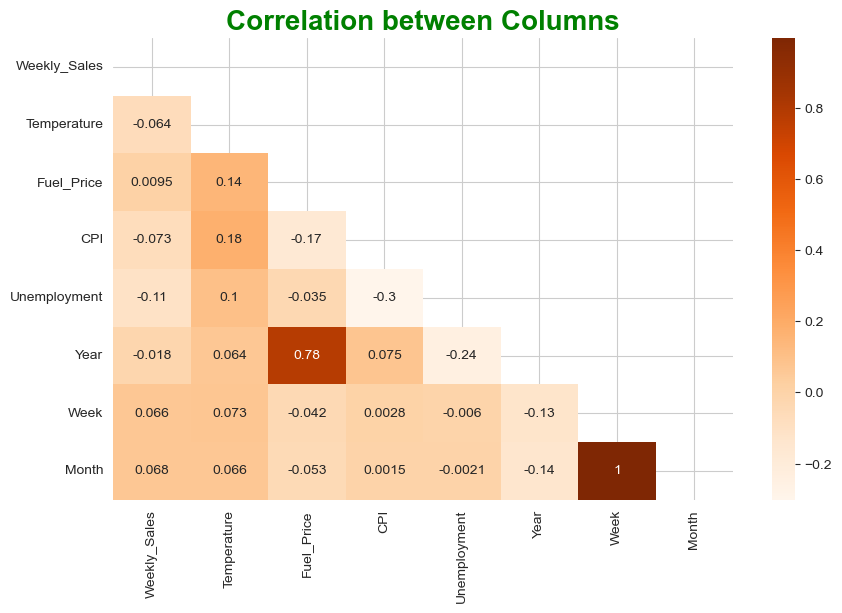

In [78]:
#looking at correaltion between columns

plt.figure(figsize=(10,6))
heatmap_data = df_Walmart.corr()
mask = np.triu(np.ones_like(heatmap_data, dtype=bool))
sns.heatmap(heatmap_data,annot=True,cmap='Oranges',mask = mask)
plt.title("Correlation between Columns",fontdict={'fontsize':20,'color':'Green','fontweight':'bold'})
plt.show()


<font color="#0000CD"><h3>Outliers Detection </font>

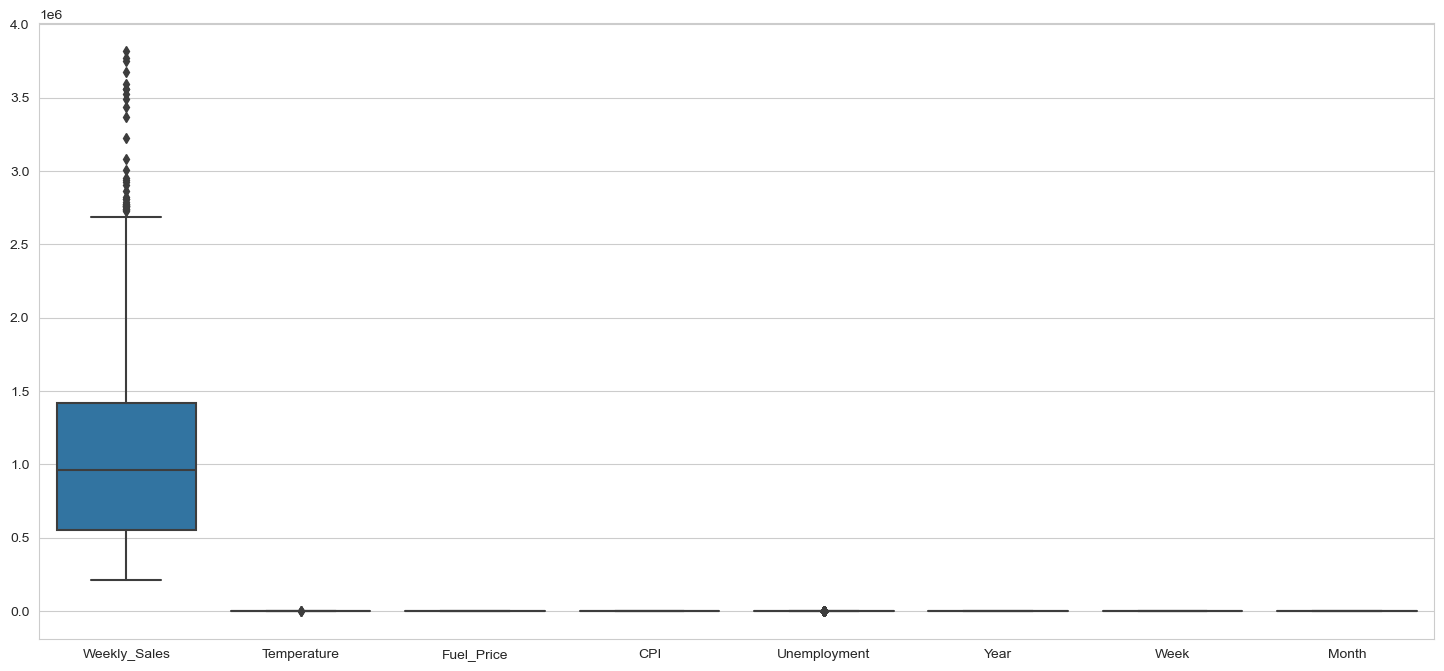

In [79]:
# Using box plots
plt.figure(figsize=(18,8))
colours = sns.color_palette(n_colors=8)
sns.boxplot(data = df_Walmart,palette=colours)
plt.show() 

<font color="#0000CD"><h3>Outlier Treament </font>

In [80]:
Q3 = df_Walmart['Weekly_Sales'].quantile(0.75)
Q1 = df_Walmart['Weekly_Sales'].quantile(0.25)
IQR = Q3-Q1
upperLimit = Q3+(1.5*IQR)
lowerLimit = Q1-(1.5*IQR)

In [81]:
filt = ((df_Walmart['Weekly_Sales']<= upperLimit) & (df_Walmart['Weekly_Sales']>= lowerLimit))
df_Walmart = df_Walmart[filt]

In [82]:
df_Walmart

Store       Date  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
0        1 2010-05-02    1643690.90            0        42.31       2.572   
1        1 2010-12-02    1641957.44            1        38.51       2.548   
2        1 2010-02-19    1611968.17            0        39.93       2.514   
3        1 2010-02-26    1409727.59            0        46.63       2.561   
4        1 2010-05-03    1554806.68            0        46.50       2.625   
...    ...        ...           ...          ...          ...         ...   
6430    45 2012-09-28     713173.95            0        64.88       3.997   
6431    45 2012-05-10     733455.07            0        64.89       3.985   
6432    45 2012-12-10     734464.36            0        54.47       4.000   
6433    45 2012-10-19     718125.53            0        56.47       3.969   
6434    45 2012-10-26     760281.43            0        58.85       3.882   

             CPI  Unemployment  Year  Week  Month  
0     211.096358         8.106  2010    17      5  
1     211.242170         8.106  2010    48     12  
2     211.289143         8.106  2010     7      2  
3     211.319643         8.106  2010     8      2  
4     211.350143         8.106  2010    18      5  
...          ...           ...   ...   ...    ...  
6430  192.013558         8.684  2012    39      9  
6431  192.170412         8.667  2012    19      5  
6432  192.327265         8.667  2012    50     12  
6433  192.330854         8.667  2012    42     10  
6434  192.308899         8.667  2012    43     10  

[6401 rows x 11 columns]

<font color="#0000CD"><h3>Checking for duplicate values </font>

In [83]:
df_Walmart.duplicated().sum()

0

<font color="#FF8C00"><h2>INSIGHTS that will give a clear perspective on the following </font>

<font color="#0000CD"><h3>If the Weekly_Sales are affected by the Unemployment Rate </font>


<font color="#000000"><h4>Correlation between WeeklySales and Unemployment Rate </font>

In [84]:
#checking correaltion between Weekly Sales and Unemployment Rate
correlationCoeff = df_Walmart['Weekly_Sales'].corr(df_Walmart['Unemployment'])
print("The correlation coefficient of Weekly Sales and Unemployment Rate is : ",correlationCoeff)

The correlation coefficient of Weekly Sales and Unemployment Rate is :  -0.10429750912578391


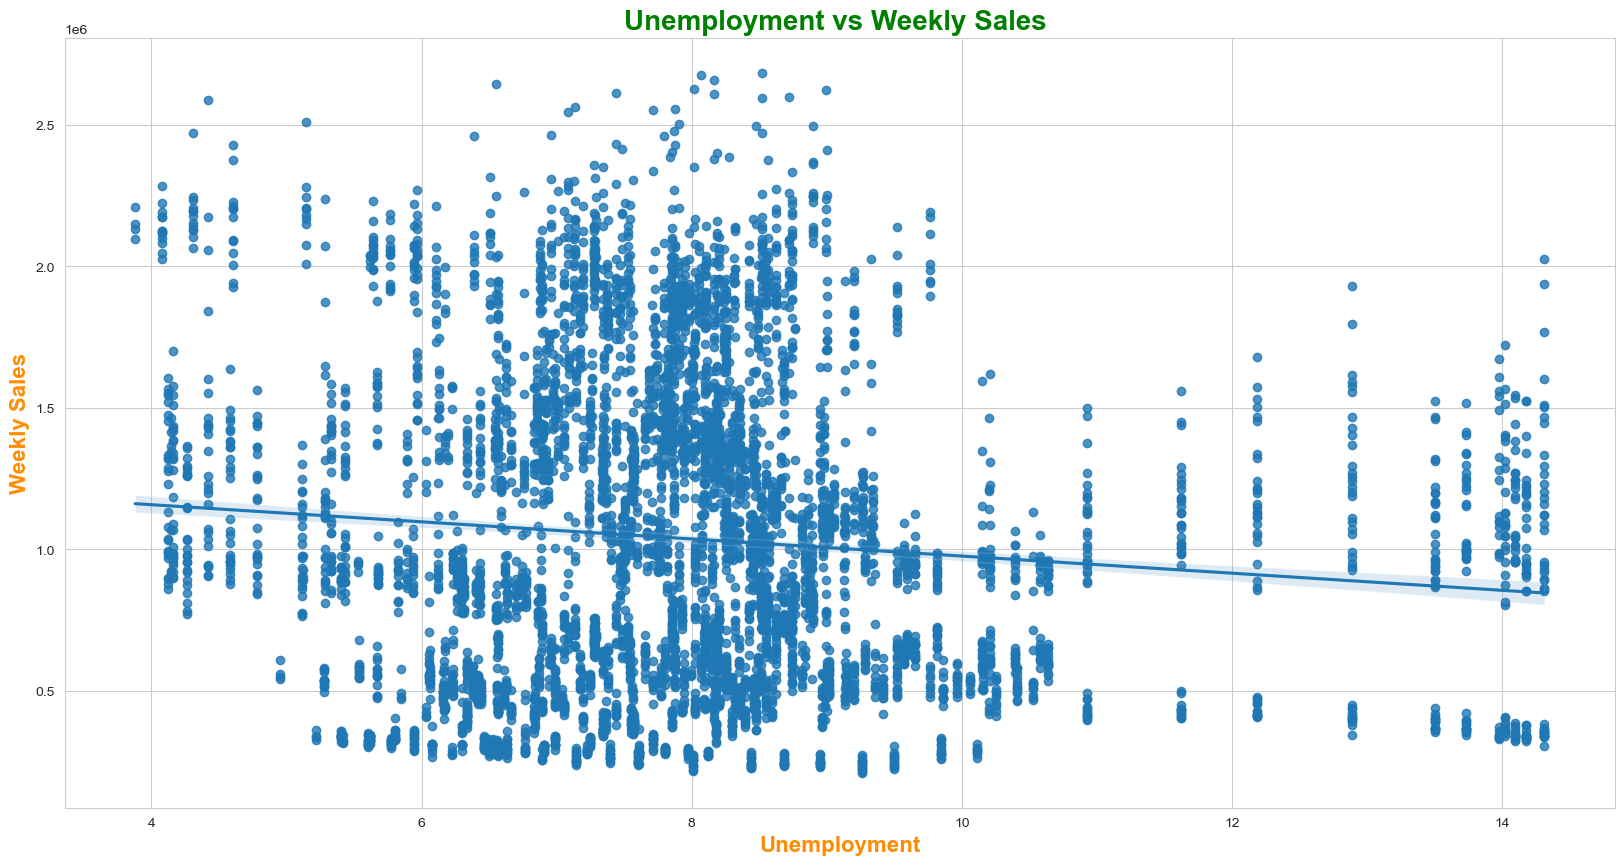

In [85]:
#plotting the regression plot

plt.figure(figsize=(20,10))
sns.regplot(data = df_Walmart,x = 'Unemployment',y = 'Weekly_Sales')

# Set the title
plt.title('Unemployment vs Weekly Sales ',fontdict={'fontsize':20,'color':'Green','fontweight':'bold'})

# Set the x and y axis labels
plt.xlabel('Unemployment', color='#FF8C00',  fontweight='bold', fontsize=16)
plt.ylabel('Weekly Sales', color='#FF8C00',  fontweight='bold', fontsize=16)

plt.show()

 <font color="#0000CD"><h4>Which Stores are suffering the most? </font>

In [86]:
# getting the correaltion between weekly sales and unemployment and sorting it
sortewise_correlation = df_Walmart.groupby('Store')['Weekly_Sales', 'Unemployment'].corr().unstack().sort_values(by = ('Weekly_Sales','Unemployment'))

#restting the index
sortewise_correlation.reset_index(inplace = True)

#creating filter
min_corr = sortewise_correlation[('Weekly_Sales','Unemployment')].min()
filt = (sortewise_correlation[('Weekly_Sales','Unemployment')]==min_corr)
store = sortewise_correlation.loc[filt, 'Store']
print("Stores with the Highest Negative Correlation with Unemployment Rate:",store[0])

Stores with the Highest Negative Correlation with Unemployment Rate: 38


 <font color="#0000CD"><h4>If the Weekly_Sales show a seasonal trend? </font>
 <font color="#00FF00"><h6>When and what could be the reason? </font>



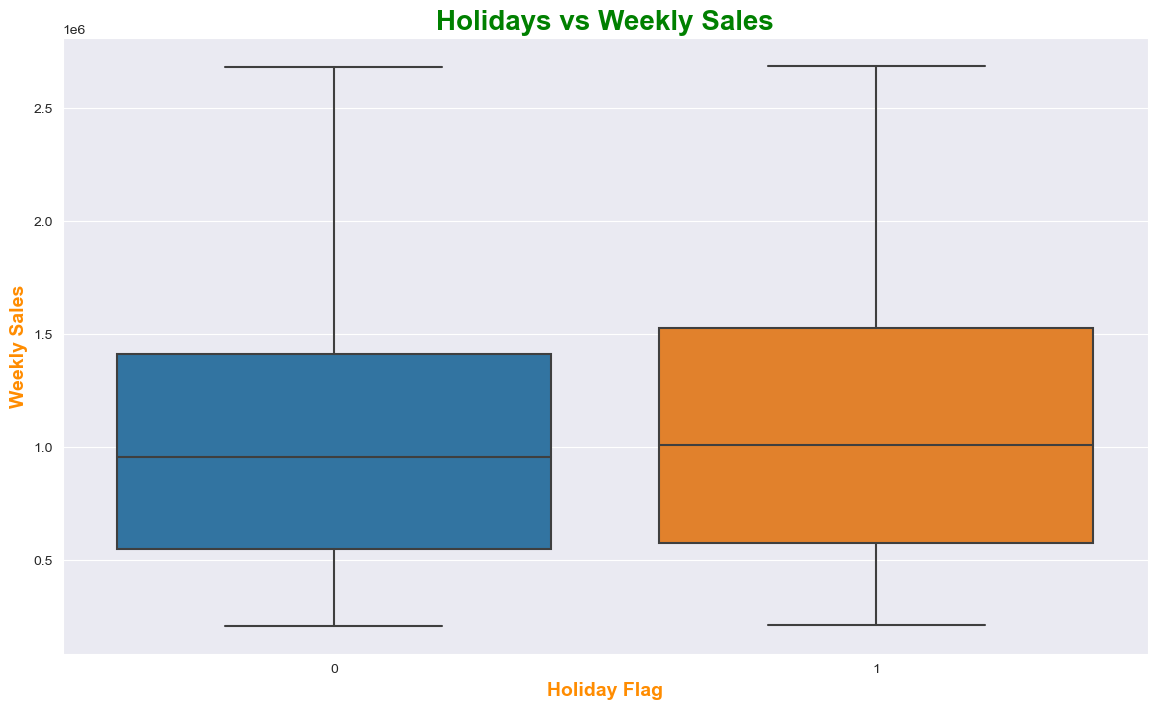

In [87]:
# checking for holiday flag and how it affects weekly sales
plt.figure(figsize=(14,8))
sns.set_style('darkgrid')
sns.boxplot(data = df_Walmart,x = 'Holiday_Flag',y = 'Weekly_Sales')
plt.title("Holidays vs Weekly Sales",fontdict={'fontsize':20,'color':'Green','fontweight':'bold'})
plt.xlabel('Holiday Flag', color='#FF8C00',  fontweight='bold', fontsize=14)
plt.ylabel('Weekly Sales', color='#FF8C00',  fontweight='bold', fontsize=14)
plt.show()

  <font color="#0000CD"><h4>Does temperature affect the Weekly_Sales in any manner? </font>
    

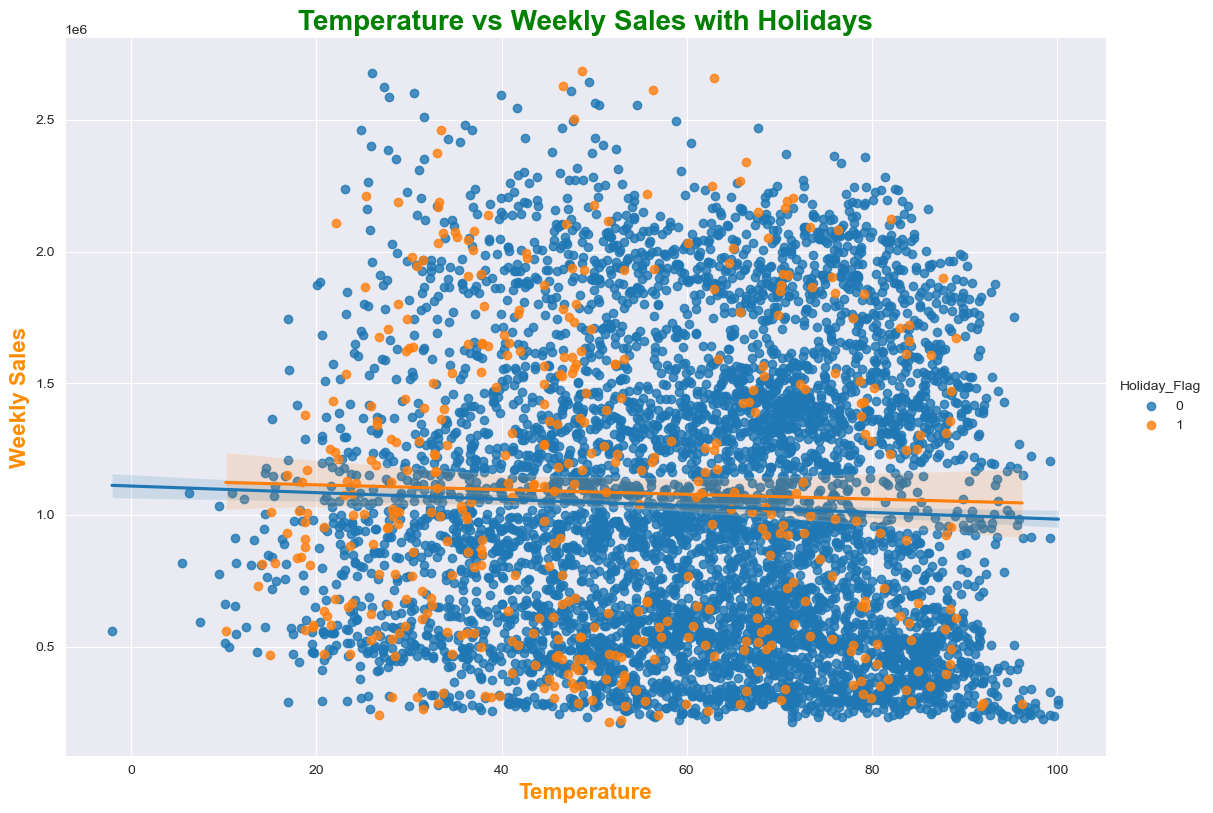

In [88]:
# checking fortemperature and how it affects weekly sales with holiday flag
sns.set_style('darkgrid')
sns.lmplot(data = df_Walmart,x = 'Temperature',y = 'Weekly_Sales',hue='Holiday_Flag',height=8, aspect=1.4)
plt.title("Temperature vs Weekly Sales with Holidays",fontdict={'fontsize':20,'color':'Green','fontweight':'bold'})
plt.xlabel('Temperature', color='#FF8C00',  fontweight='bold', fontsize=16)
plt.ylabel('Weekly Sales', color='#FF8C00',  fontweight='bold', fontsize=16)
plt.show()

<font color="#0000CD"><h4>Changes in Temperature over time</font>

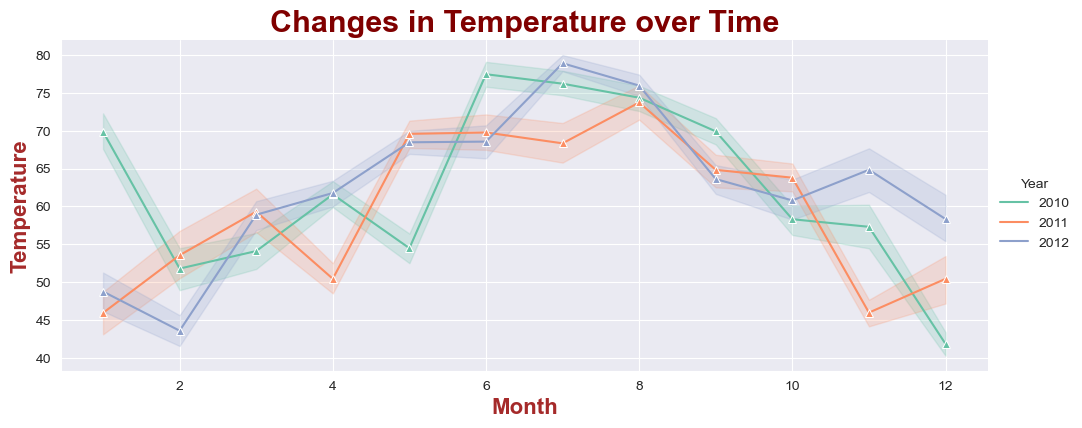

In [89]:
sns.set_style('darkgrid')
sns.relplot(data = df_Walmart,x = 'Month',y = 'Temperature',hue='Year',
            kind = 'line',height = 4,aspect=2.5,palette='Set2',
            marker ='^')

# Set the title
plt.title('Changes in Temperature over Time', fontdict={'fontsize':22,'color':'Maroon','fontweight':'bold'})

# Set the x and y axis labels
plt.xlabel('Month', color='brown',fontweight='bold', fontsize=16)
plt.ylabel('Temperature', color='brown',fontweight='bold', fontsize=16)
plt.show()

  <font color="#0000CD"><h4>How is the Consumer Price index (CPI) affecting the Weekly_Sales of various Stores?</font>


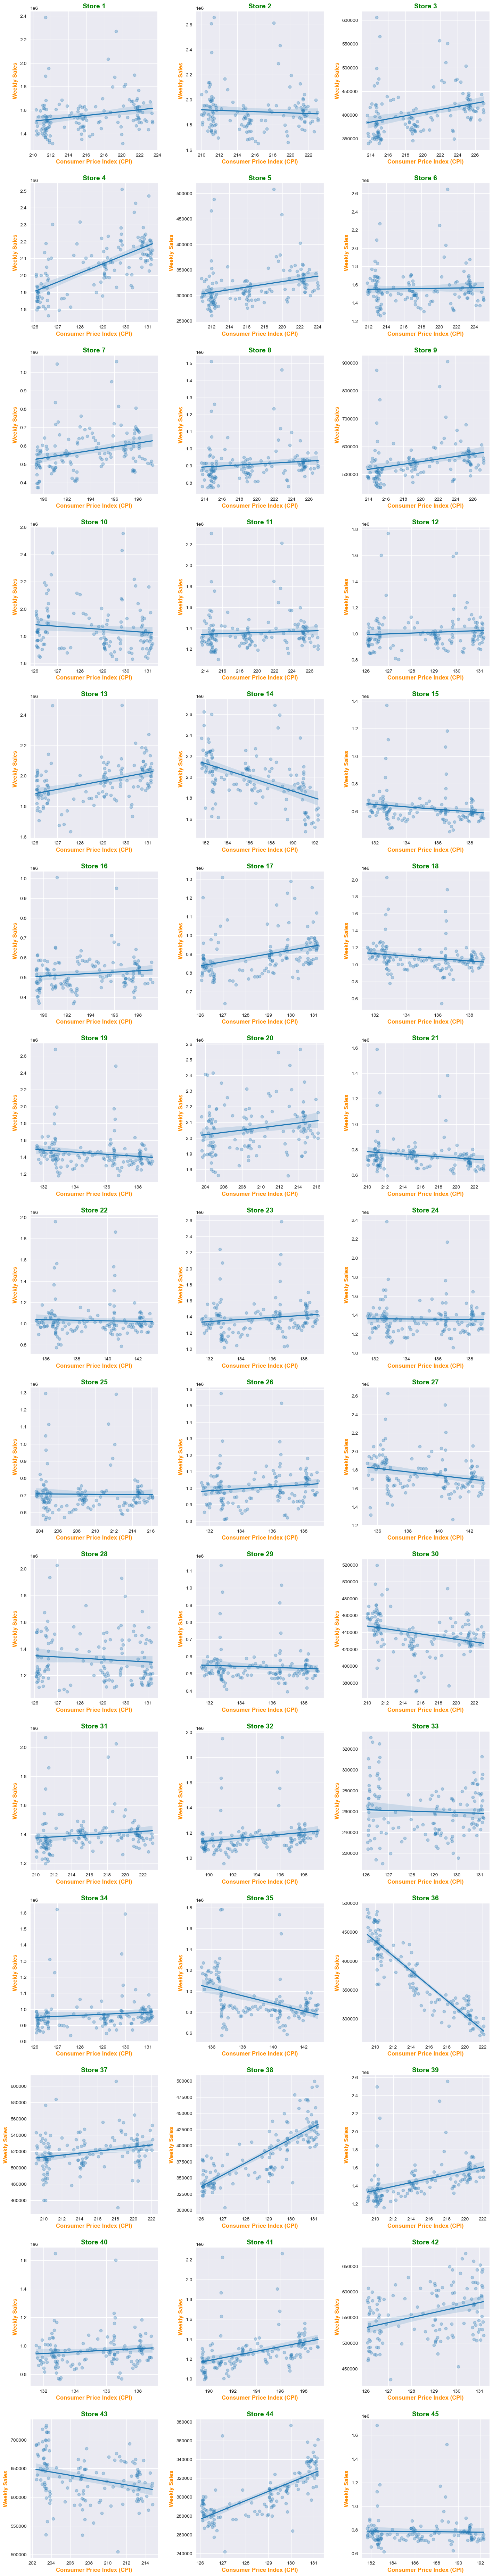

In [90]:
# Create a list of unique store numbers
stores = df_Walmart['Store'].unique()

# Set up subplots

fig, axes = plt.subplots(nrows=len(stores)//3, ncols=3, figsize=(15, 5*len(stores)//3))
fig.tight_layout(pad=5.0)

# Iterate over each store and create a scatter plot
for i, store_num in enumerate(stores):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Filter the data for the specific store
    store_data = df_Walmart[df_Walmart['Store'] == store_num]
    
    # Plot scatter plot with regression line
    sns.set_style('darkgrid')
    sns.regplot(x='CPI', y='Weekly_Sales', data=store_data, ax=ax, scatter_kws={'alpha':0.3})

    ax.set_title(f'Store {store_num}',fontdict={'fontsize':14,'color':'Green','fontweight':'bold'})
    ax.set_xlabel('Consumer Price Index (CPI)', color='#FF8C00',  fontweight='bold', fontsize=12)
    ax.set_ylabel('Weekly Sales', color='#FF8C00', fontweight='bold', fontsize=12)

plt.show()

<font color="#0000CD"><h4>Changes in CPI (CONSUMER PRICE INDEX) over time</font>

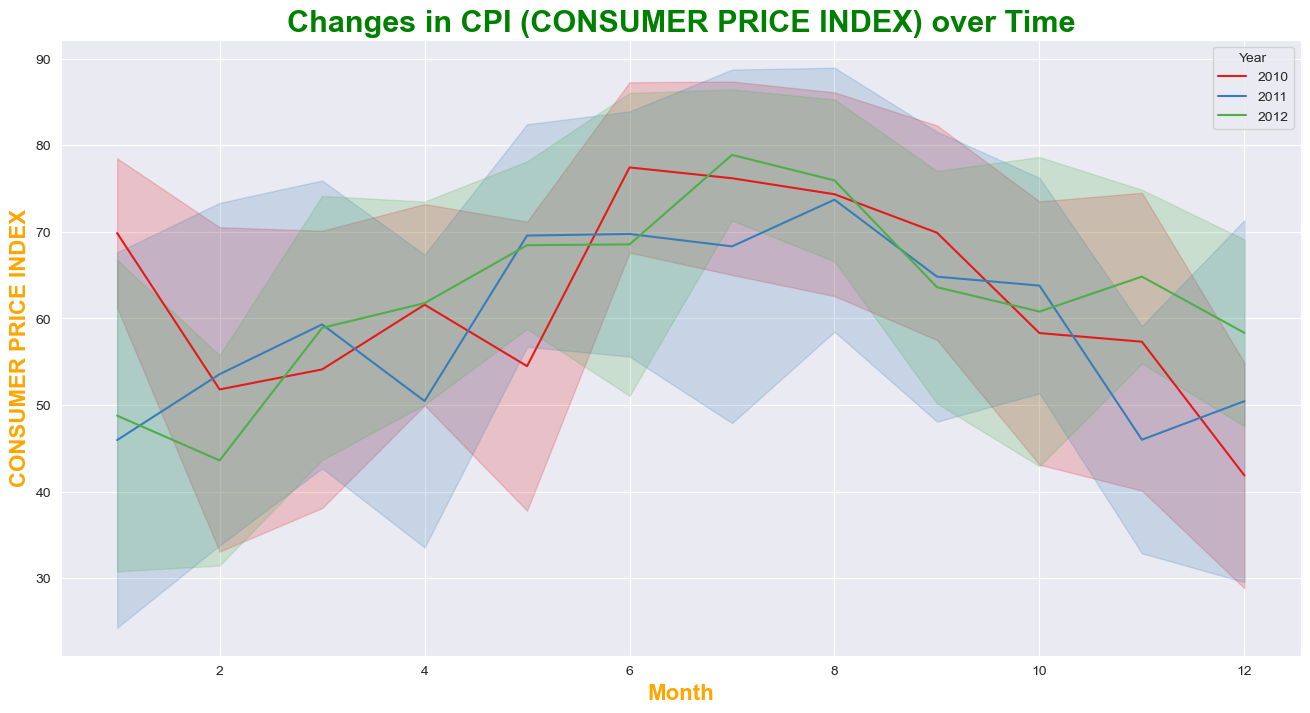

In [91]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
sns.lineplot(
    data=df_Walmart,
    x='Month',
    y='Temperature',
    hue='Year',
    ci='sd',  # Specify the standard deviation for shading
    err_style='band',  # Use a shaded band for the confidence interval
    palette='Set1'
)

# Set the title
plt.title('Changes in CPI (CONSUMER PRICE INDEX) over Time', fontdict={'fontsize':22,'color':'Green','fontweight':'bold'})

# Set the x and y axis labels
plt.xlabel('Month', color='orange',fontweight='bold', fontsize=16)
plt.ylabel('CONSUMER PRICE INDEX', color='orange',fontweight='bold', fontsize=16)
plt.show()

  <font color="#0000CD"><h4>How is the Fuel Prices are affecting the Weekly_Sales of various Stores?</font>


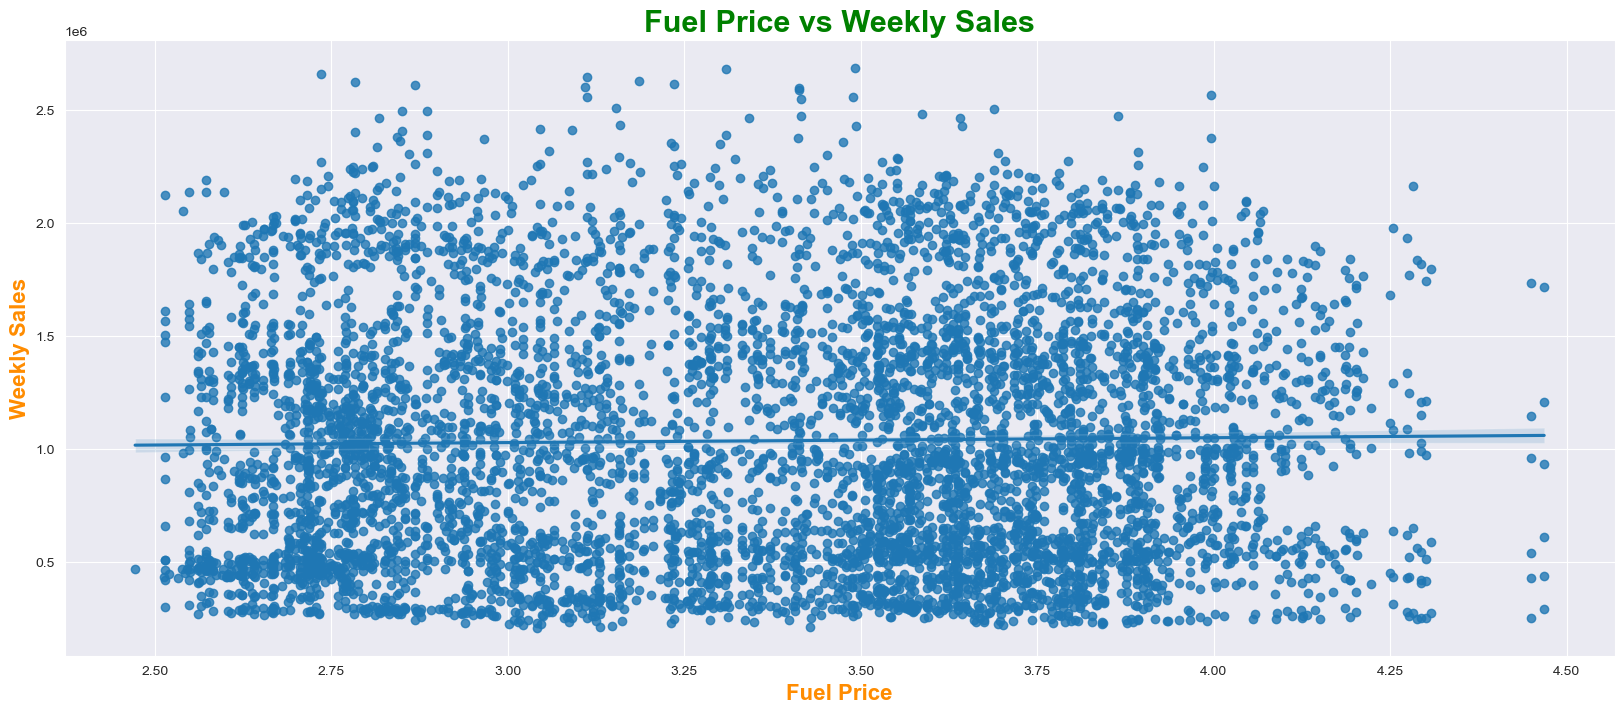

In [92]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
sns.regplot(data = df_Walmart,x = 'Fuel_Price',y = 'Weekly_Sales')

# Set the title
plt.title('Fuel Price vs Weekly Sales', fontdict={'fontsize':22,'color':'Green','fontweight':'bold'})

# Set the x and y axis labels
plt.ylabel('Weekly Sales', color='#FF8C00',  fontweight='bold', fontsize=16)
plt.xlabel('Fuel Price', color='#FF8C00',  fontweight='bold', fontsize=16)

plt.show()

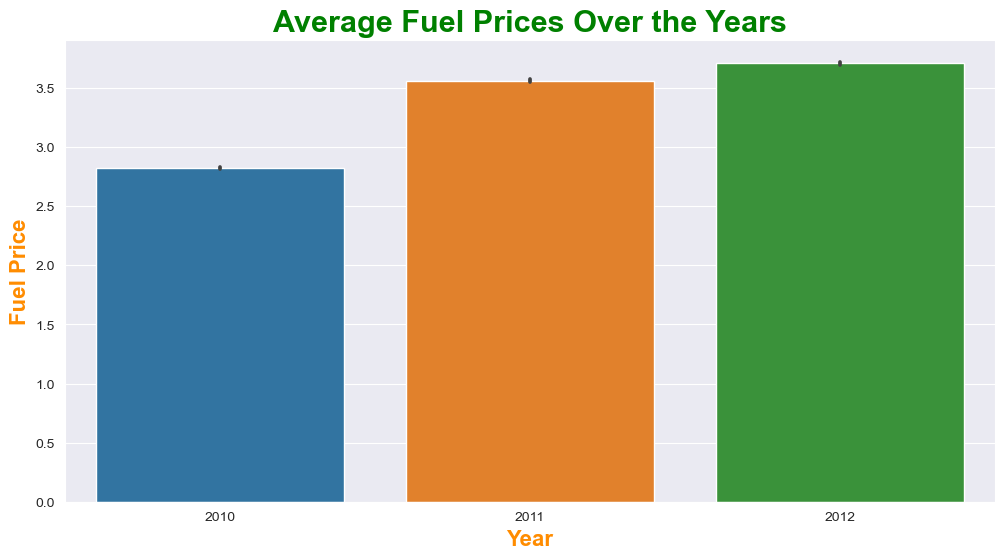

In [93]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.barplot(data = df_Walmart,x = 'Year',y = 'Fuel_Price')

# Set the title
plt.title('Average Fuel Prices Over the Years', fontdict={'fontsize':22,'color':'Green','fontweight':'bold'})

# Set the x and y axis labels
plt.xlabel('Year', color='#FF8C00',fontweight='bold', fontsize=16)
plt.ylabel('Fuel Price', color='#FF8C00',fontweight='bold', fontsize=16)

plt.show()

  <font color="#0000CD"><h4>Relation between Date and Weekly Sales</font>

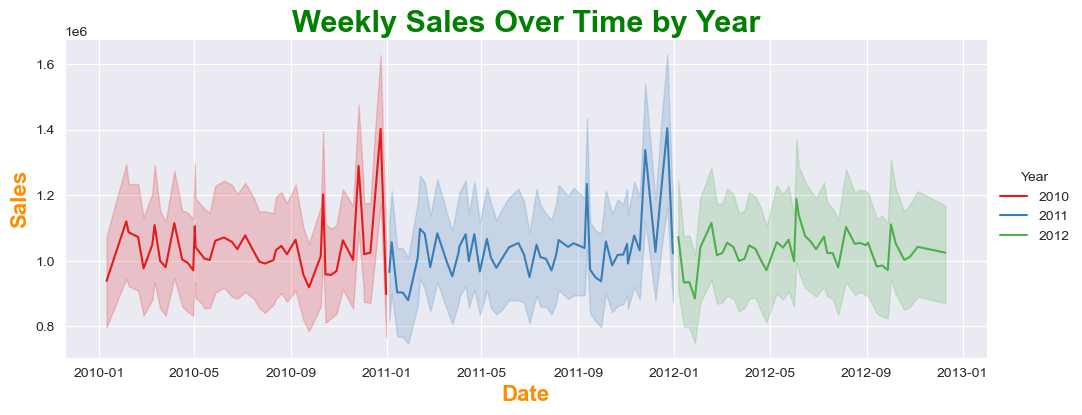

In [94]:
sns.set_style('darkgrid')
sns.relplot(data = df_Walmart,x = 'Date',y = 'Weekly_Sales',hue='Year',kind = 'line',height = 4,aspect=2.5,palette='Set1')

# Set the title
plt.title('Weekly Sales Over Time by Year', fontdict={'fontsize':22,'color':'Green','fontweight':'bold'})

# Set the x and y axis labels
plt.xlabel('Date', color='#FF8C00',fontweight='bold', fontsize=16)
plt.ylabel('Sales', color='#FF8C00',fontweight='bold', fontsize=16)
plt.show()

  <font color="#0000CD"><h4>Relation between Store and Weekly Sales</font>

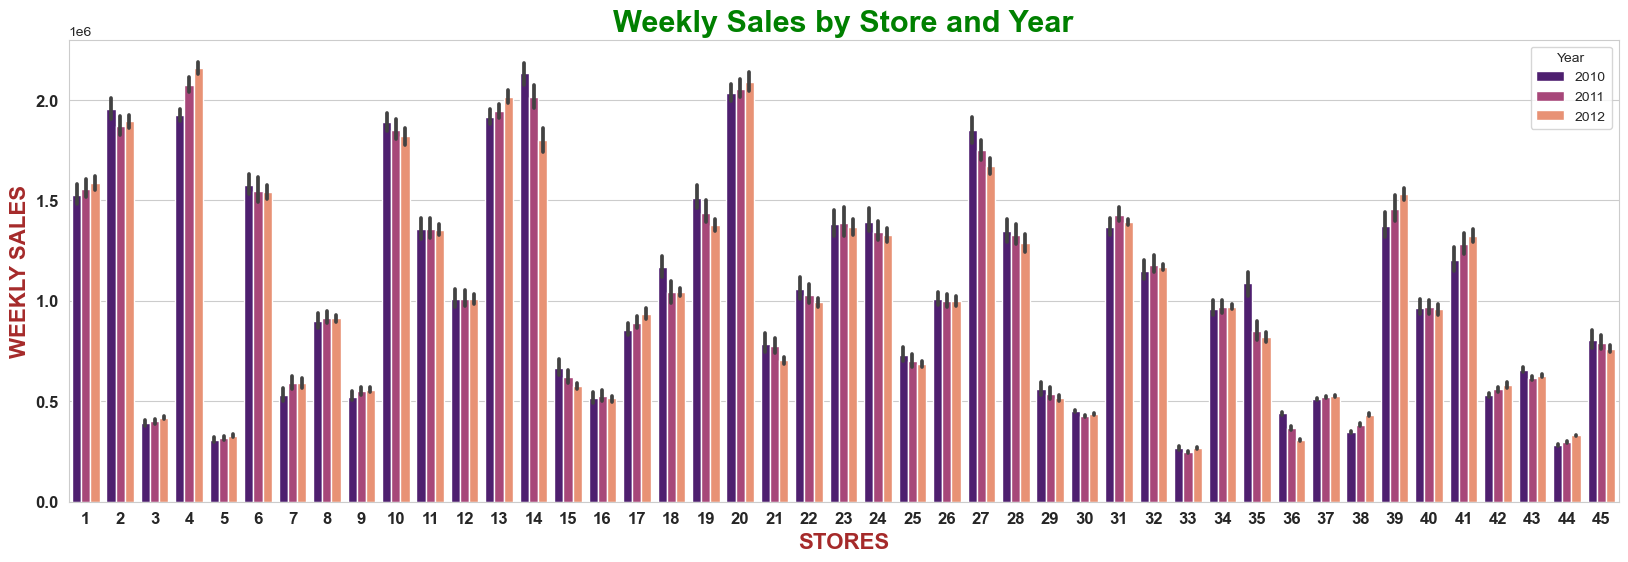

In [95]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(data = df_Walmart,x = 'Store',y = 'Weekly_Sales',hue ='Year',palette='magma' )

# Set the title
plt.title('Weekly Sales by Store and Year', fontdict={'fontsize':22,'color':'Green','fontweight':'bold'})

# Set the x and y axis labels
plt.xlabel('STORES', color='brown',fontweight='bold', fontsize=16)
plt.ylabel('WEEKLY SALES', color='brown',fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)
plt.show()

  <font color="#0000CD"><h4>TOP Performing Stores according to the historical data</font>


  <font color="#00FF00"><h6>TOP Performing Stores Year wise according to the historical data</font>

In [100]:
#grouping the data Year wsie and then Store wise
performers = df_Walmart.groupby(['Year','Store']).agg(Yearly_Sales=('Weekly_Sales','sum')).reset_index()

best_store = pd.DataFrame()
# getting unique values in Year column
year = df_Walmart.Year.unique()
for i in year:
    # Filter the top performers for the current year
    filt = (performers['Year'] == i)
    max_sale = performers[filt]['Yearly_Sales'].max()
    mask = (performers['Yearly_Sales']==max_sale)
    best_store = pd.concat([best_store,performers[filt][mask]])
    
best_store.reset_index(drop = True,inplace=True)  

#Changing the datatype to int for Store column
best_store['Store'] = best_store['Store'].astype('int')
unique_years = sorted(best_store['Year'].unique())
#plotting the graph for top performing stores
fig = px.bar(
    best_store,
    x='Year',
    y='Yearly_Sales',
    color='Store',
    color_discrete_sequence=px.colors.qualitative.Set1,
    category_orders={"Year": sorted(best_store['Year'].unique())},  # Enforce order without decimals

)
fig.update_layout(  
        xaxis=dict(
        tickmode='array',
        tickvals=unique_years,
        dtick=1,  # Set the tick interval to 1 to display only integer values
),
    title='<b>Yearly Sales Trends: Top Performing Stores (2010-2012)</b>',
    xaxis_title='<b>Year</b>',
    yaxis_title='<b>Yearly Sales</b>',
    showlegend=True,
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="black"
    ),
    title_font=dict(
        family="Arial, sans-serif",
        size=22,
        color="green",
        )
)
fig.show()

  <font color="#0000CD"><h4>WORST Performing Stores according to the historical data</font>

In [97]:
worst_store = pd.DataFrame()
# getting unique values in Year column
year = df_Walmart.Year.unique()
for i in year:
    # Filter the top performers for the current year
    filt = (performers['Year']==i)
    min_sale = performers[filt]['Yearly_Sales'].min()
    mask = (performers[filt]['Yearly_Sales']==min_sale)
    worst_store = pd.concat([worst_store,performers[filt][mask]])
    
worst_store.reset_index(drop = True,inplace=True)  

#Changing the datatype to int for Store column
worst_store['Store'] = worst_store['Store'].astype('int')
unique_years = sorted(worst_store['Year'].unique())
#plotting the graph for top performing stores
fig = px.bar(
    worst_store,
    x='Year',
    y='Yearly_Sales',
    color='Store',
    color_discrete_sequence=px.colors.qualitative.Set1,
    category_orders={"Year": sorted(worst_store['Year'].unique())},  # Enforce order without decimals

)
fig.update_layout(  
        xaxis=dict(
        tickmode='array',
        tickvals=unique_years,
        dtick=1,  # Set the tick interval to 1 to display only integer values
),
    title='<b>Yearly Sales Trends: Worst Performing Stores (2010-2012)</b>',
    xaxis_title='<b>Year</b>',
    yaxis_title='<b>Yearly Sales</b>',
    showlegend=True,
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="black"
    ),
    title_font=dict(
        family="Arial, sans-serif",
        size=22,
        color="green",
        )
)
fig.show()


  <font color="#0000CD"><h4>How significant is the difference between the HIGHEST and LOWEST Performing Stores</font>

In [39]:
# To assess the significance of the difference between the highest and lowest performing stores
# we will calculate various statistical measures.

for i in year:
    filt = (performers['Year']==i)
    sales_range = performers[filt]['Yearly_Sales'].max() - performers[filt]['Yearly_Sales'].min()#range
    print('Stats for Yearly Sales in the year ',i)
    print('Range : ',sales_range)
   
    sales_mean = performers[filt]['Yearly_Sales'].mean() # Avg sales
    print('Average Sales : ',sales_mean)
    
    sales_std = performers[filt]['Yearly_Sales'].std()#std deviation
    print('Standtard Deviation : ',sales_std)
    
    cv = (sales_std / sales_mean) * 100#coefficient of Variance
    print('Relative Variance : ',cv)
    
    #percentile analysis
    sales_25th_percentile = performers[filt]['Yearly_Sales'].quantile(0.25)
    sales_75th_percentile = performers[filt]['Yearly_Sales'].quantile(0.75)
    print('25th_percentile : ',sales_25th_percentile)
    print('75th_percentile : ',sales_75th_percentile)
    print(' ')

Stats for Yearly Sales in the year  2010
Range :  83192150.55
Average Sales :  49501474.735999994
Standtard Deviation :  24543508.62317917
Relative Variance :  49.58136854320803
25th_percentile :  25568078.15
75th_percentile :  65782276.32
 
Stats for Yearly Sales in the year  2011
Range :  89769365.03999999
Average Sales :  53434914.90044444
Standtard Deviation :  26897017.527062986
Relative Variance :  50.33603511332488
25th_percentile :  29117302.669999998
75th_percentile :  74169225.52
 
Stats for Yearly Sales in the year  2012
Range :  81335638.21
Average Sales :  44447396.87444445
Standtard Deviation :  23019092.759410933
Relative Variance :  51.78951834780234
25th_percentile :  24827530.71
75th_percentile :  59212433.28
 


  <font color="#0000CD"><h3>Distribution graph of columns </font>

  <font color="#0000CD"><h5>Temperature </font>

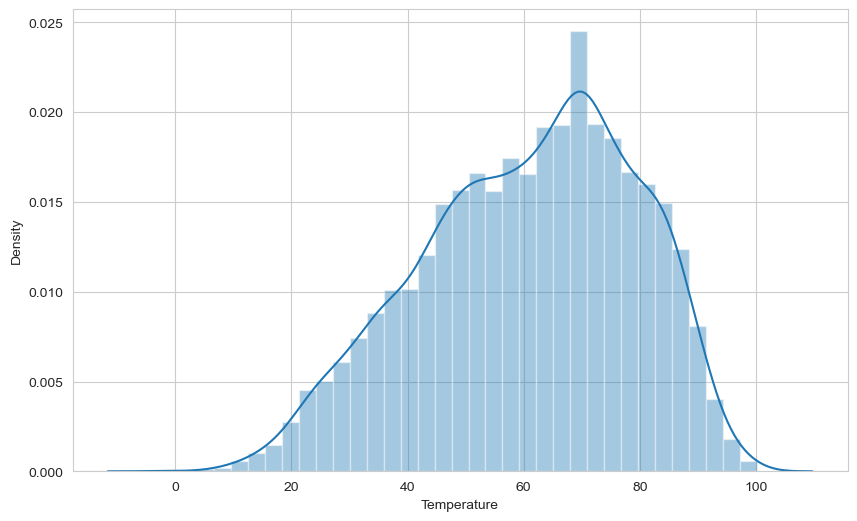

In [40]:
plt.figure(figsize=(10,6))
sns.distplot(df_Walmart['Temperature'])
plt.show()

  <font color="#0000CD"><h5>Fuel Price </font>

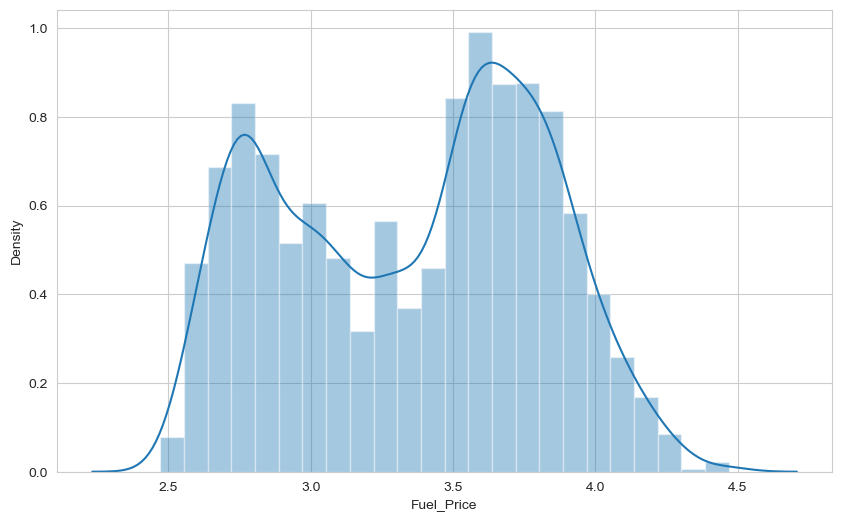

In [41]:
plt.figure(figsize=(10,6))
sns.distplot(df_Walmart['Fuel_Price'])
plt.show()

  <font color="#0000CD"><h5>CPI </font>

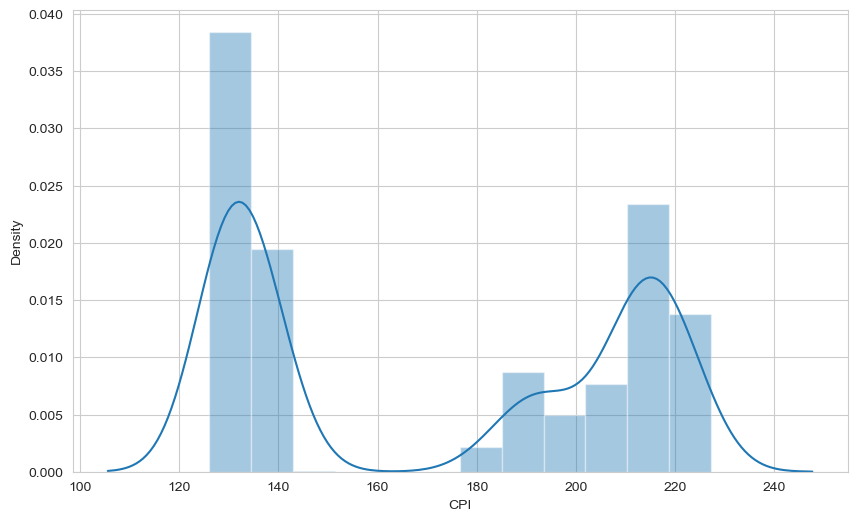

In [42]:
plt.figure(figsize=(10,6))
sns.distplot(df_Walmart['CPI'])
plt.show()

  <font color="#0000CD"><h5>Unemployment </font>

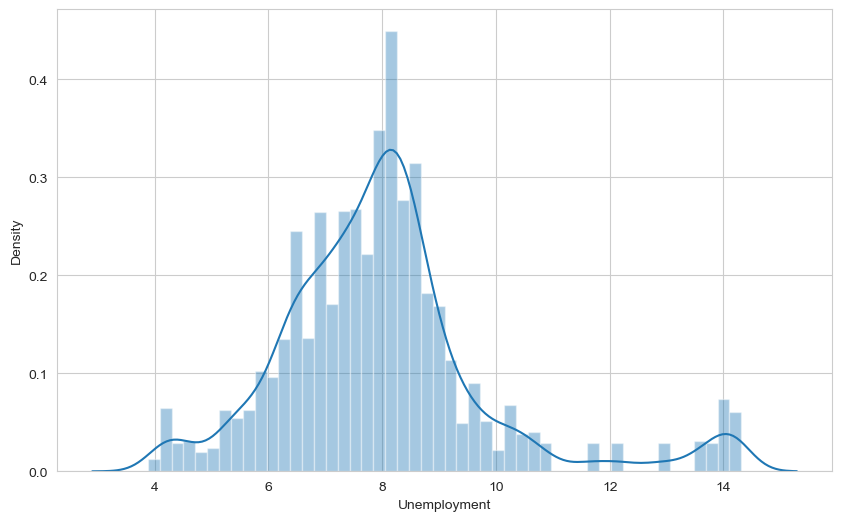

In [43]:
plt.figure(figsize=(10,6))
sns.distplot(df_Walmart['Unemployment'])
plt.show()

In [44]:
df_Walmart.skew()

Weekly_Sales    0.497428
Temperature    -0.344571
Fuel_Price     -0.101046
CPI             0.061319
Unemployment    1.186512
Year            0.057389
Week            0.021496
Month           0.027883
dtype: float64

 <font color="#0000CD"><h3>VIF check for multicolinearity </font>

In [45]:
lst = list(df_Walmart.columns)
lst.remove('Weekly_Sales')
lst.remove('Store')
lst.remove('Holiday_Flag')
lst.remove('Date')
X = df_Walmart[lst]
y = df_Walmart['Weekly_Sales']


In [46]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

        feature         VIF
0   Temperature   13.291808
1    Fuel_Price   60.255810
2           CPI   24.527554
3  Unemployment   22.061234
4          Year  145.332635
5          Week  606.455295
6         Month  691.535853


In [47]:
#we can drop year,month,week columns as those columns were not there in the original data
df_Walmart.drop(columns=['Year','Week','Month'],inplace = True)

  <font color="#0000CD"><h4>Insights from distribution and skewness for selection of transformers </font>
     <font color="#FF8C00"><h5>Temprature & Fuel need PowerTransformer</font>
        <font color="#FF8C00"><h5>Unemployment needs FunctionTransformer</font>
            <font color="#FF8C00"><h5>To select features we need to do a statistical assement to remove multicollinear columns</font>

In [48]:
X = df_Walmart[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df_Walmart['Weekly_Sales']

model = sm.OLS(y, sm.add_constant(X)).fit()

In [49]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     36.53
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           3.06e-30
Time:                        22:17:14   Log-Likelihood:                -93560.
No. Observations:                6401   AIC:                         1.871e+05
Df Residuals:                    6396   BIC:                         1.872e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.651e+06   7.72e+04     21.378   

  <font color="#0000CD"><h4>We will select models which are robust to multicollinearity or handle it gracefully </font>
<font color="#000000"><h5>Decision Tree</font>
  <font color="#000000"><h5>Random Forest</font>
      <font color="#000000"><h5>XGBoost</font>
        
    

<font color="#FF8C00"><h2>Predictive Models.</font>

  <font color="#0000CD"><h3>FEATURE TRANSFORMATION AND SELECTION </font>

  <font color="#00FF00"><h4>Feature Transformation and Predicting </font>

In [50]:
#setting Date column to index
df_Walmart.set_index('Date',inplace = True)

In [51]:
df_Walmart.head()

Store  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                   
2010-05-02     1    1643690.90            0        42.31       2.572   
2010-12-02     1    1641957.44            1        38.51       2.548   
2010-02-19     1    1611968.17            0        39.93       2.514   
2010-02-26     1    1409727.59            0        46.63       2.561   
2010-05-03     1    1554806.68            0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-05-02  211.096358         8.106  
2010-12-02  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-05-03  211.350143         8.106

In [52]:
lst = list(df_Walmart.columns)
lst.remove('Weekly_Sales')
X = df_Walmart[lst]
y = df_Walmart['Weekly_Sales']

In [53]:
function_list = ['Unemployment']
power_list = ['Temperature','Fuel_Price']
skip_list = ['Store','Holiday_Flag','CPI']

In [54]:
transformers = [('function',FunctionTransformer(np.log1p),function_list),
               ('power',PowerTransformer(),power_list),
               ('skip','passthrough',skip_list)]

In [55]:
column_Transformer = ColumnTransformer(transformers=transformers,remainder = 'passthrough')

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

results_df = pd.DataFrame(columns=['Model', 'y_test', 'y_pred', 'R2 Score'])
# Define models and their respective hyperparameter grids
models = {
    'Decision Tree': (DecisionTreeRegressor(), {'model__max_depth': [None, 5, 10, 15]}),
    'Random Forest': (RandomForestRegressor(), {'model__n_estimators': [10, 50, 100], 'model__max_depth': [None, 5, 10]}),
    'XGBoost': (XGBRegressor(), {'model__n_estimators': [50, 100, 200], 'model__max_depth': [3, 5, 7]})
}

# Perform hyperparameter tuning and evaluation for each model
for model_name, (model, param_grid) in models.items():
    pipeline = Pipeline([
        ('preprocessing', column_Transformer),  # Include any necessary preprocessing steps
        ('model', model),
    ])

    # Create a GridSearchCV object
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        scoring='r2',  # Use mean squared error as the scoring metric
        cv=5,  # 5-fold cross-validation
        n_jobs=-1  # Use all available CPU cores
    )

    # Fit the GridSearchCV object on the training data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters and corresponding mean squared error
    best_params = grid_search.best_params_
    best_mse = -grid_search.best_score_
    print(f"{model_name} - Best Hyperparameters: {best_params}, Best Mean Squared Error: {best_mse}")

    # Make predictions on the test set using the best model
    y_pred = grid_search.predict(X_test)

    # Evaluate the model on the test set
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the DataFrame
    results_df = results_df.append({
        'Model': model_name,
        'y_test': y_test.values,
        'y_pred': y_pred,
        'R2 Score': r2
    }, ignore_index=True)



Decision Tree - Best Hyperparameters: {'model__max_depth': 10}, Best Mean Squared Error: -0.9206793331169172
Random Forest - Best Hyperparameters: {'model__max_depth': None, 'model__n_estimators': 100}, Best Mean Squared Error: -0.9461783055997636
XGBoost - Best Hyperparameters: {'model__max_depth': 5, 'model__n_estimators': 200}, Best Mean Squared Error: -0.95688975410082


In [57]:
# Display the results DataFrame
results_df

Model                                             y_test  \
0  Decision Tree  [1054454.4, 1591920.42, 1415473.91, 498580.87,...   
1  Random Forest  [1054454.4, 1591920.42, 1415473.91, 498580.87,...   
2        XGBoost  [1054454.4, 1591920.42, 1415473.91, 498580.87,...   

                                              y_pred  R2 Score  
0  [1085797.6744444445, 1095429.9233333333, 14192...  0.919111  
1  [1070848.9127000018, 1124118.5976999989, 13974...  0.942977  
2  [1053759.5, 1379877.9, 1402597.4, 820874.1, 17...  0.964359

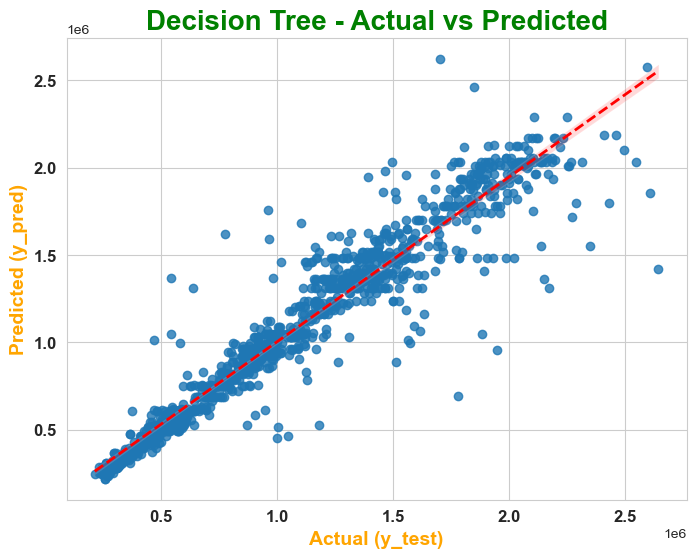

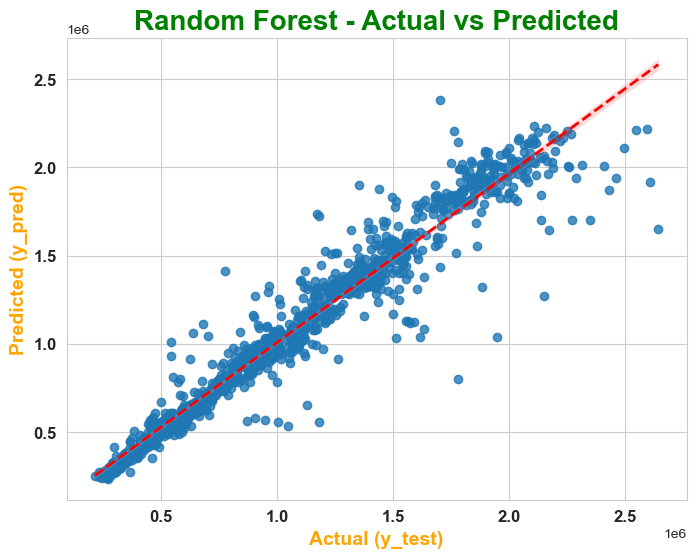

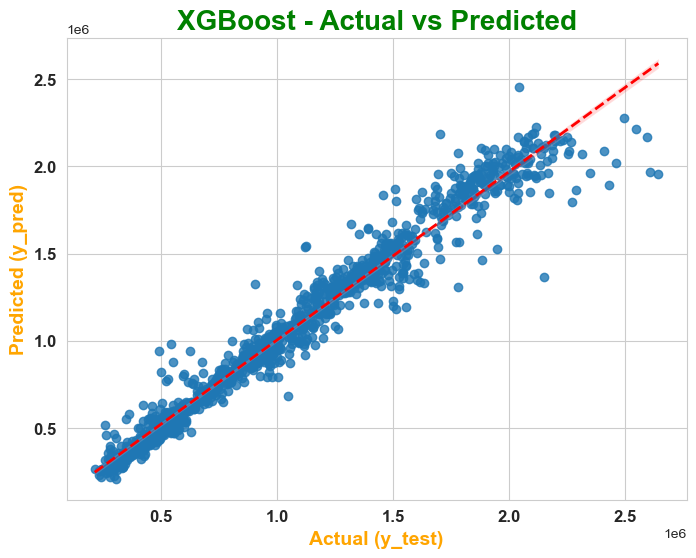

In [58]:
for i, row in results_df.iterrows():
    plt.figure(figsize=(8, 6))
    sns.regplot(x=row['y_test'], y=row['y_pred'], line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2})
    plt.title(f"{row['Model']} - Actual vs Predicted",fontdict={'fontsize':20,'color':'Green','fontweight':'bold'})
    plt.xlabel('Actual (y_test)',fontdict={'fontsize':14,'color':'orange','fontweight':'bold'})
    plt.ylabel('Predicted (y_pred)',fontdict={'fontsize':14,'color':'orange','fontweight':'bold'})
    plt.xticks(fontweight='bold', fontsize=12)
    plt.yticks(fontweight='bold', fontsize=12)
    plt.show()

  <font color="#0000CD"><h4>Insights </font>
      <font color="#00000"><h4>XGBOOST performs the best </font>

<font color="#0000CD"><h2>Future Possibilities </font>

1. **Advanced Predictive Modeling**: While the current models (Decision Tree, Random Forest, XGBoost) provided satisfactory results, future work could explore more advanced forecasting models, including neural networks and time series models like ARIMA or SARIMA.

2. **Dynamic Feature Engineering**: Incorporate additional features or engineered features to enhance model accuracy. For example, adding promotional events, economic indicators, or regional data could provide a more comprehensive understanding of sales dynamics.

3. **Fine-Tuning Models**: Further hyperparameter tuning and optimization of the selected models could improve their predictive performance. Grid search techniques and Bayesian optimization can be explored for this purpose.

4. **Dynamic Inventory Management**: Utilize insights gained to optimize inventory management strategies. Understanding the impact of external factors can help Walmart plan for demand fluctuations and reduce stockouts or overstock situations.

5. **Real-Time Data Integration**: Implement real-time data integration to capture the most recent information. This would enable Walmart to adapt its strategies promptly based on changing economic conditions, consumer behavior, or external events.

6. **Geospatial Analysis**: Incorporate geospatial analysis to understand the impact of location on sales. Factors such as population density, competition, and local events can play a crucial role in store performance.

7. **Customer Segmentation**: Analyze customer segmentation to tailor marketing and sales strategies for different consumer groups. This can be achieved by leveraging data on purchasing behavior, demographics, and preferences.

8. **Collaborative Filtering**: Implement collaborative filtering techniques to provide personalized recommendations to customers. This can enhance the customer shopping experience and potentially boost sales.
    
9. **Real-time Dashboard**: Developing a real-time dashboard to visualize the predicted versus actual sales, key performance indicators, and relevant metrics could assist stakeholders in making informed decisions promptly. This would enable quick reactions to emerging trends or anomalies.

By continuously refining models, incorporating new data sources, and adopting advanced analytics techniques, Walmart can stay ahead in the highly competitive retail landscape and make informed, data-driven decisions.

This concludes the analysis and provides a roadmap for future enhancements and strategic planning for Walmart's sales forecasting.


<font color="#0000CD"><h2>Conclusion </font>

In conclusion, the analysis of Walmart's sales data has provided valuable insights into various factors affecting weekly sales across its multiple stores. The key findings are:

1. **Unemployment Impact**: There is a negative correlation between Weekly Sales and Unemployment Rate. Some stores show a stronger negative correlation, indicating that economic conditions may influence sales.

2. **Seasonal Trends**: The analysis suggests the presence of seasonal trends, especially during holiday weeks, which significantly impact Weekly Sales. This insight can help Walmart better prepare for peak sales periods.

3. **Temperature Influence**: Temperature appears to have an impact on Weekly Sales, with a slight positive correlation. Further analysis indicates that during colder months, sales tend to increase.

4. **CPI and Fuel Prices**: The Consumer Price Index (CPI) shows varying impacts on Weekly Sales across different stores. Fuel prices also exhibit an influence on sales, but the relationship is not as straightforward.

5. **Store Performance**: The analysis identifies top-performing and worst-performing stores based on yearly sales trends. Understanding the performance of individual stores can guide strategic decision-making.

6. **Statistical Analysis**: Detailed statistical measures, including range, average sales, standard deviation, and coefficient of variance, were computed to assess the significance of the difference between the highest and lowest performing stores.
    
7. **The predictive modeling**: The predictive models, particularly XGBoost, demonstrated strong performance in forecasting weekly sales. However, the future possibilities outlined suggest avenues for further refinement and enhancement of the forecasting process.    

<font color="#0000CD"><h2>References</h2></font>

Box, G. E. P., Jenkins, G. M., Reinsel, G. C., & Ljung, G. M. (2015). Time Series Analysis: Forecasting and Control. Wiley.
Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. In Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD '16).
Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: Principles and Practice. OTexts.
Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.
Zhang, G. P. (2003). Time series forecasting using a hybrid ARIMA and neural network model. Neurocomputing, 50, 159-175.